<a href="https://colab.research.google.com/github/NSR98/FSI-IA/blob/master/Lego_BricksPersonalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


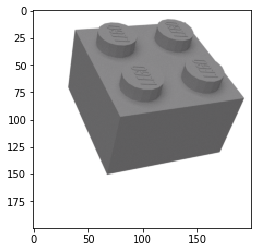

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train/3003 Brick 2x2/0028.png', 'r')
imshow(np.asarray(pil_im))

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

# DATA SOURCE --------------------------------------------------

batch_size = 20

data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train'

datagen = ImageDataGenerator(rescale=1./255,
                            validation_split=0.25)


train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = True)

validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical', 
        shuffle = False)

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Desactiva el 25% de las neuronas al actualizar los pesos para evitar overfitting
model.add(Flatten())      # Convierte el tensor en un vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.sgd(),
              metrics=['accuracy'])


model.summary()

Found 6379 images belonging to 16 classes.
Found 6379 images belonging to 16 classes.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
________________________________________________________

In [0]:
# TRAINING --------------------------------------------------

data = model.fit_generator(
        train_generator,
        steps_per_epoch=239,
        epochs=40, 
        validation_data=validation_generator,
        validation_steps=80,
)

Epoch 1/50
239/239 [==============================] - 22s 93ms/step - loss: 1.8979 - acc: 0.3776 - val_loss: 0.8579 - val_acc: 0.6900
Epoch 2/50
239/239 [==============================] - 21s 87ms/step - loss: 1.1943 - acc: 0.5733 - val_loss: 0.9473 - val_acc: 0.5987
Epoch 3/50
239/239 [==============================] - 21s 89ms/step - loss: 0.9505 - acc: 0.6552 - val_loss: 0.4968 - val_acc: 0.8150
Epoch 4/50
239/239 [==============================] - 19s 81ms/step - loss: 0.8239 - acc: 0.6960 - val_loss: 0.4207 - val_acc: 0.9024
Epoch 5/50
239/239 [==============================] - 21s 89ms/step - loss: 0.7270 - acc: 0.7317 - val_loss: 0.4845 - val_acc: 0.8425
Epoch 6/50
239/239 [==============================] - 20s 82ms/step - loss: 0.6711 - acc: 0.7483 - val_loss: 0.5022 - val_acc: 0.8325
Epoch 7/50
239/239 [==============================] - 19s 81ms/step - loss: 0.5896 - acc: 0.7813 - val_loss: 0.1995 - val_acc: 0.9444
Epoch 8/50
239/239 [==============================] - 19s 81ms

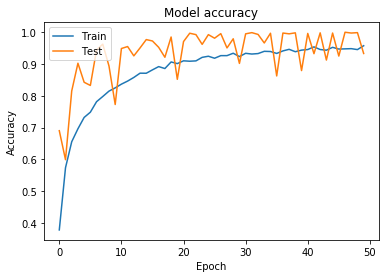

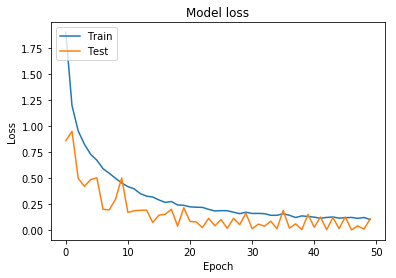

In [0]:
import matplotlib.pyplot as plt


# ACCURACY
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# LOSS
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from keras.preprocessing import image

img_path = '/content/drive/My Drive/Colab Notebooks/datasets/Lego-Bricks/train/3069 Flat Tile 1x2/0002.png'
img = image.load_img(img_path, target_size=(200,200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

label_map = (train_generator.class_indices)
print(label_map)

features = model.predict(x)
print(features)

{'11214 Bush 3M friction with Cross axle': 0, '18651 Cross Axle 2M with Snap friction': 1, '2357 Brick corner 1x2x2': 2, '3003 Brick 2x2': 3, '3004 Brick 1x2': 4, '3005 Brick 1x1': 5, '3022 Plate 2x2': 6, '3023 Plate 1x2': 7, '3024 Plate 1x1': 8, '3040 Roof Tile 1x2x45deg': 9, '3069 Flat Tile 1x2': 10, '32123 half Bush': 11, '3673 Peg 2M': 12, '3713 Bush for Cross Axle': 13, '3794 Plate 1X2 with 1 Knob': 14, '6632 Technic Lever 3M': 15}
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
